### KNN (K-Nearest Neighbors) Lab

In this lab we will attempt to classify, whether or not a wine is HIGH or LOW quality. This is a classification task since we will attempt to discrimnate between these two options.  To do so, we will take as input features of each wine and previous labels of HIGH or LOW quality.

In [36]:
import pandas as pd
import seaborn as sns
%matplotlib inline


# Load in the dataset
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


#### Classifying high quality wines
- In this dataset, `quality` is a numeric column, if we were performing regression, we could predict this value.
- Since we are performing classification, we will predict `high_quality` which is 1 or 0, a binary label.
- What is the baseline accuracy that we should attempt to beat?

In [37]:
df.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [68]:
df.high_quality.describe()

# This shows that 19.6% of the entries are low quality. 
# Meaning, if we simply predicted EVERYTHING was low quality we would get 80.4% accuracy! 
# (With very bad recall, but that is for another lesson)

count    6497.000000
mean        0.196552
std         0.397421
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: high_quality, dtype: float64

#### What features are important to predict high quality wines?
- Let's explore the dataset

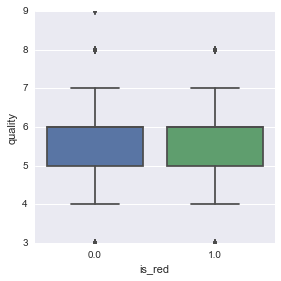

In [69]:
# Does it matter if the wine is red or white?
sns.factorplot(
    data = df,
    x = 'is_red',
    y = 'quality',
    kind = 'box'
)

# Doesn't seem like it.

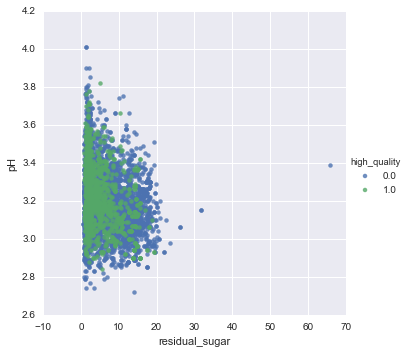

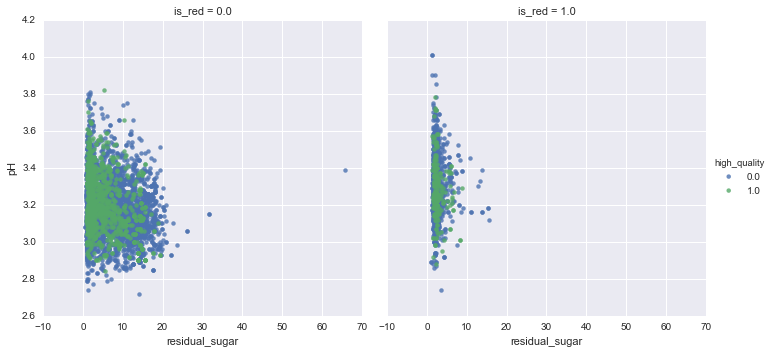

In [53]:
# Is sugar or acidity (pH) important?
# Does this change if we look at red or white wines?

p = sns.lmplot(
    data = df,
    x = 'residual_sugar',
    y = 'pH',
    hue = 'high_quality',
    fit_reg = False
)

# Yes, low sugar wines tend to be high quality, across any pH range

p = sns.lmplot(
    data = df,
    x = 'residual_sugar',
    y = 'pH',
    hue = 'high_quality',
    col='is_red',
    fit_reg = False
)

# Similar trend in red vs white, but red's tend to have less sugar overall

#### Build K-Nearest Neighbors model to predict whether or not a wine is high quality
- Select features you think will be predictive of high quality wines
- Scale the dataset (remember, this is so that each variable contributes equally to the distance computation)
- Evaluate the accuracy of your model using cross-validation
- Evaluate different values of `n` to see how the number of neighbors affects the classification accuracy

In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Setup your target variable and feature matrix
y = df.high_quality
features = ['sulphates', 
            'chlorides', 
            'residual_sugar', 
            'volatile_acidity',
            'pH', 
            'free_sulfur_dioxide',
            'alcohol']
X = df[features]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Build the model object and set the number of neighbors required.
# We will use the default distance metric, Euclidean distance
model = KNeighborsClassifier(n_neighbors=20)

# Use cross-validation to evaluate the accuracy of the model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model, X, y)
print(scores)
print("Mean Accuracy:", scores.mean())

[ 0.81255771  0.82179132  0.76859122]
Mean Accuracy: 0.80098008483


In [67]:
for num_neighbors in range(1, 40):
    # Build the model object and set the number of neighbors required.
    # We will use the default distance metric, Euclidean distance
    model = KNeighborsClassifier(n_neighbors=num_neighbors)

    # Use cross-validation to evaluate the accuracy of the model
    scores = cross_val_score(model, X, y)
    print("Neighbors:", num_neighbors, "Mean Accuracy:", scores.mean())

Neighbors: 1 Mean Accuracy: 0.760187643453
Neighbors: 2 Mean Accuracy: 0.791436839333
Neighbors: 3 Mean Accuracy: 0.774039836027
Neighbors: 4 Mean Accuracy: 0.799286687608
Neighbors: 5 Mean Accuracy: 0.78635444411
Neighbors: 6 Mean Accuracy: 0.798517362244
Neighbors: 7 Mean Accuracy: 0.786816977617
Neighbors: 8 Mean Accuracy: 0.796054142081
Neighbors: 9 Mean Accuracy: 0.791743133613
Neighbors: 10 Mean Accuracy: 0.79713196528
Neighbors: 11 Mean Accuracy: 0.794513856458
Neighbors: 12 Mean Accuracy: 0.798979042761
Neighbors: 13 Mean Accuracy: 0.793436601918
Neighbors: 14 Mean Accuracy: 0.800056510548
Neighbors: 15 Mean Accuracy: 0.793282992742
Neighbors: 16 Mean Accuracy: 0.799132580855
Neighbors: 17 Mean Accuracy: 0.797438614973
Neighbors: 18 Mean Accuracy: 0.800826191324
Neighbors: 19 Mean Accuracy: 0.800209337817
Neighbors: 20 Mean Accuracy: 0.80098008483
Neighbors: 21 Mean Accuracy: 0.800364510807
Neighbors: 22 Mean Accuracy: 0.803905340922
Neighbors: 23 Mean Accuracy: 0.800210190807
